In [1]:
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
import csv
#from textblob import TextBlob

import sklearn
import cPickle
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC, LinearSVC
from sklearn.metrics import classification_report, f1_score, accuracy_score, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.grid_search import GridSearchCV
from sklearn.cross_validation import StratifiedKFold, cross_val_score, train_test_split 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.learning_curve import learning_curve
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer 

/home/analyst/anaconda2/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/home/analyst/anaconda2/lib/python2.7/site-packages/sklearn/grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)
/home/analyst/anaconda2/lib/python2.7/site-packages/sklearn/learning_curve.py:23: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the functions are moved. This module will be removed in 0

In [2]:
messages = pd.read_csv('SMSSpamCollection.txt', sep='\t', quoting=csv.QUOTE_NONE,
                           names=["label", "message"])
messages.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [3]:
messages.groupby('label').describe()

message
label                                                          
ham   count                                                4827
      unique                                               4518
      top                                Sorry, I'll call later
      freq                                                   30
spam  count                                                 747
      unique                                                653
      top     Please call our customer service representativ...
      freq                                                    4

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f67514e6b10>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x7f675148a210>], dtype=object)

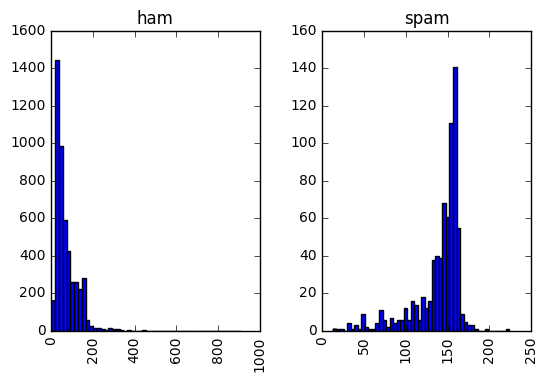

In [4]:
messages['length'] = messages['message'].map(lambda text: len(text))
messages.hist(column='length', by='label', bins=50)


In [3]:
X = messages.message
y = messages.label.apply(lambda x: 1 if x == 'spam' else 0)

In [6]:
clf = CountVectorizer()
X_desc = clf.fit_transform(X).toarray()

In [7]:
print X.shape, X_desc.shape

(5574,) (5574, 8713)


In [8]:
LogisticRegression().fit(X_desc,y )

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [9]:
np.random_state = 2
cross_val_score(LogisticRegression(),X_desc,y, cv = 10,scoring = 'f1').mean()

0.93334852685794145

In [10]:
model = LogisticRegression().fit(X_desc,y )

In [11]:
str1 = "FreeMsg: Txt: CALL to No: 86888 & claim your reward of 3 hours talk time to use from your phone now! Subscribe6GB"
clf.transform(str1).shape
model.predict(clf.transform([str1]))[0]

1

In [12]:
str1 = 'FreeMsg: Txt: claim your reward of 3 hours talk time'
clf.transform(str1).shape
model.predict(clf.transform([str1]))[0]

1

In [13]:
str1 = "Have you visited the last lecture on physics? Just buy this book and you will have all materials! Only 99$"
clf.transform(str1).shape
model.predict(clf.transform([str1]))[0]

0

In [14]:
str1 = "Have you visited the last lecture on physics?"
clf.transform(str1).shape
model.predict(clf.transform([str1]))[0]

0

In [15]:
str1 = "Only 99$"
clf.transform(str1).shape
model.predict(clf.transform([str1]))[0]

0

In [ ]:
clf = CountVectorizer(ngram_range=(2,2))
X_desc = clf.fit_transform(X).toarray()
np.random_state = 2
cross_val_score(LogisticRegression(),X_desc,y, cv = 10,
                scoring = 'f1').mean()

0.82242206641871329

In [ ]:
clf = CountVectorizer(ngram_range=(3,3))
X_desc = clf.fit_transform(X).toarray()
np.random_state = 2
cross_val_score(LogisticRegression(),X_desc,y, cv = 10,
                scoring = 'f1').mean()

In [ ]:
clf = CountVectorizer(ngram_range=(1,3))
X_desc = clf.fit_transform(X).toarray()
np.random_state = 2
cross_val_score(LogisticRegression(),X_desc,y, cv = 10,
                scoring = 'f1').mean()